# Stage 1 Null Analysis

`feat_e_3` 결측 패턴과 row_null≥95 고결측 행을 점검하는 노트북입니다. 실행 전후 용량 관리를 위해 저장 직전에 `du -sh / 2>/dev/null`로 디스크 사용량을 확인하세요.


In [1]:
from pathlib import Path
import sys
ROOT = Path('..').resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))
ROOT


PosixPath('/Competition/toss-ad-click-prediction')

In [2]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.data.null_analysis import (
    NullAnalysisConfig,
    feat_e3_overview,
    feat_e3_by_column,
    high_null_overview,
    high_null_by_column,
)
from src.data.features import FeatureConfig, prepare_features
sns.set_theme()


In [3]:
DATA_PATH = ROOT / 'data' / 'train.parquet'
cfg = NullAnalysisConfig(data_path=str(DATA_PATH), feature_col='feat_e_3', target_col='clicked', high_null_threshold=95)
cfg


NullAnalysisConfig(data_path='/Competition/toss-ad-click-prediction/data/train.parquet', feature_col='feat_e_3', target_col='clicked', high_null_threshold=95)

## feat_e_3 전체/타깃별 결측 비율


In [4]:
feat_e3_summary = feat_e3_overview(cfg)
feat_e3_summary


total_rows,null_count,null_ratio,clicked,rows
u32,u32,f64,i32,u32
10704179,1085557,0.101414,null,null
null,1064879,0.101417,0,10500000
null,20678,0.101274,1,204179


## feat_e_3 결측률 상위 요일 / 인벤토리 / 시간대


In [5]:
feat_e3_by_day = feat_e3_by_column(cfg, 'day_of_week', top_n=10)
feat_e3_by_inventory = feat_e3_by_column(cfg, 'inventory_id', top_n=20)
feat_e3_by_hour = feat_e3_by_column(cfg, 'hour', top_n=10)
feat_e3_by_day, feat_e3_by_inventory, feat_e3_by_hour


(shape: (7, 4)
 ┌─────────────┬─────────┬────────────┬────────────┐
 │ day_of_week ┆ rows    ┆ null_count ┆ null_ratio │
 │ ---         ┆ ---     ┆ ---        ┆ ---        │
 │ str         ┆ u32     ┆ u32        ┆ f64        │
 ╞═════════════╪═════════╪════════════╪════════════╡
 │ 1           ┆ 1525483 ┆ 246738     ┆ 0.161744   │
 │ 7           ┆ 1526335 ┆ 210995     ┆ 0.138236   │
 │ 3           ┆ 1529921 ┆ 144934     ┆ 0.094733   │
 │ 2           ┆ 1532022 ┆ 132488     ┆ 0.086479   │
 │ 5           ┆ 1529839 ┆ 126583     ┆ 0.082743   │
 │ 4           ┆ 1530297 ┆ 118697     ┆ 0.077565   │
 │ 6           ┆ 1530282 ┆ 105122     ┆ 0.068695   │
 └─────────────┴─────────┴────────────┴────────────┘,
 shape: (18, 4)
 ┌──────────────┬─────────┬────────────┬────────────┐
 │ inventory_id ┆ rows    ┆ null_count ┆ null_ratio │
 │ ---          ┆ ---     ┆ ---        ┆ ---        │
 │ str          ┆ u32     ┆ u32        ┆ f64        │
 ╞══════════════╪═════════╪════════════╪════════════╡
 │ 39    

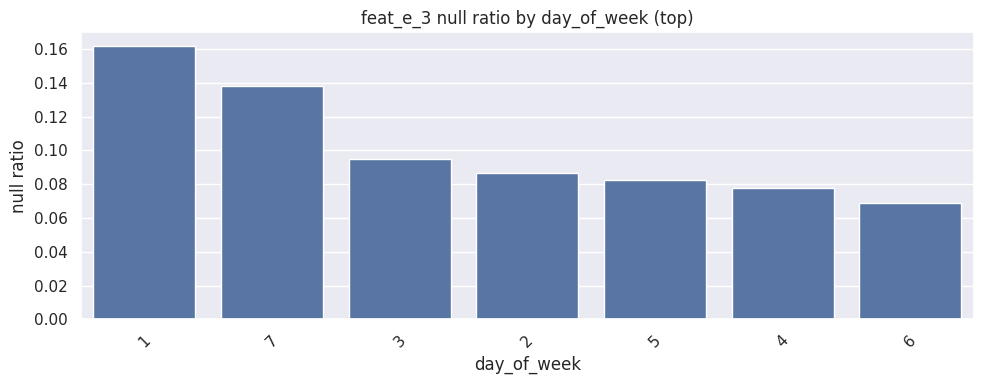

In [6]:
plt.figure(figsize=(10,4))
sns.barplot(data=feat_e3_by_day.to_pandas(), x='day_of_week', y='null_ratio', color='C0')
plt.title('feat_e_3 null ratio by day_of_week (top)')
plt.ylabel('null ratio')
plt.xlabel('day_of_week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## high null (row_nulls ≥ 95) 분포


In [7]:
high_null_summary = high_null_overview(cfg)
high_null_by_inventory = high_null_by_column(cfg, 'inventory_id', top_n=20)
high_null_by_day = high_null_by_column(cfg, 'day_of_week', top_n=None)
high_null_summary, high_null_by_inventory, high_null_by_day


(shape: (3, 6)
 ┌────────────┬────────────────┬─────────────────┬─────────┬───────┬─────────────┐
 │ total_rows ┆ high_null_rows ┆ high_null_ratio ┆ clicked ┆ rows  ┆ target_mean │
 │ ---        ┆ ---            ┆ ---             ┆ ---     ┆ ---   ┆ ---         │
 │ u32        ┆ u32            ┆ f64             ┆ i32     ┆ u32   ┆ f64         │
 ╞════════════╪════════════════╪═════════════════╪═════════╪═══════╪═════════════╡
 │ 10704179   ┆ 17208          ┆ 0.001608        ┆ null    ┆ null  ┆ null        │
 │ null       ┆ null           ┆ null            ┆ 0       ┆ 16802 ┆ 0.0         │
 │ null       ┆ null           ┆ null            ┆ 1       ┆ 406   ┆ 1.0         │
 └────────────┴────────────────┴─────────────────┴─────────┴───────┴─────────────┘,
 shape: (18, 4)
 ┌──────────────┬──────┬─────────────┬───────────┐
 │ inventory_id ┆ rows ┆ target_mean ┆ avg_nulls │
 │ ---          ┆ ---  ┆ ---         ┆ ---       │
 │ str          ┆ u32  ┆ f64         ┆ f64       │
 ╞══════════════╪

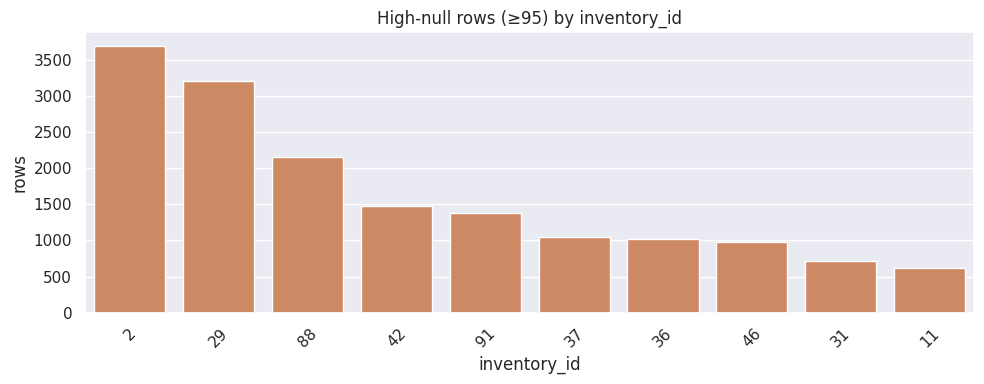

In [8]:
plt.figure(figsize=(10,4))
sns.barplot(data=high_null_by_inventory.to_pandas().head(10), x='inventory_id', y='rows', color='C1')
plt.title('High-null rows (≥95) by inventory_id')
plt.ylabel('rows')
plt.xlabel('inventory_id')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 비교용 피처 준비 (플래그 포함)


In [9]:
sample_df = pl.scan_parquet(str(DATA_PATH)).head(10000).collect()
feature_cfg = FeatureConfig()
X_sample, y_sample = prepare_features(sample_df, feature_cfg, has_target=True)
X_sample[[c for c in X_sample.columns if 'feat_e_3' in c or 'row_nulls' in c]].head()


/tmp/ipykernel_92334/2805547407.py:1: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  sample_df = pl.scan_parquet(str(DATA_PATH)).head(10000).collect(streaming=True)


,feat_e_3,row_nulls_ge_95,feat_e_3_is_null
0,23.863636,0.0,0.0
1,4.545455,0.0,0.0
2,22.727272,0.0,0.0
3,3.863636,0.0,0.0
4,8.522727,0.0,0.0


## Null Indicator 비교 메모 (2025-09-20 CLI)
- `python src/train/train.py --seed 42` 실행에서 Null 플래그 미적용/적용 LightGBM이 AP 0.60384 → 0.60394(+0.00009), WLL 0.64746 → 0.64756(+0.00010)로 실질 차이가 없음.
- 공통 피처 스케일은 완전히 동일했고(`row_nulls_ge_95`, `feat_e_3_is_null` 두 열만 추가), Stage 1 플래그 정책이 안정적으로 동작함을 확인.


## Null 분포 요약 (전수 기준)
- 전체 CTR은 0.01907이며 `feat_e_3` 결측 여부에 따른 CTR은 유사(0.01905 vs 0.01908).
- row_null_count ≥95 구간은 전체의 0.16%지만 CTR 0.0236으로 평균 대비 +24%p, 주요 인벤토리에 집중됨.
- 아래 표/그래프는 전체 train을 기준으로 CLI에서 재집계한 결과임.


In [10]:
import polars as pl
from src.data.null_analysis import NullAnalysisConfig, _with_null_count

cfg_cli = NullAnalysisConfig(
    data_path=str((ROOT / 'data' / 'train.parquet').resolve()),
    feature_col='feat_e_3',
    target_col='clicked',
    high_null_threshold=95,
)

lf_cli = pl.scan_parquet(cfg_cli.data_path)
overall_ctr_cli = lf_cli.select(pl.col(cfg_cli.target_col).mean().alias('ctr')).collect()
feat_e3_flag_cli = (
    lf_cli.with_columns(pl.col(cfg_cli.feature_col).is_null().cast(pl.Int8).alias('feat_e_3_is_null'))
    .group_by('feat_e_3_is_null')
    .agg([
        pl.len().alias('rows'),
        pl.col(cfg_cli.target_col).mean().alias('ctr'),
    ])
    .sort('feat_e_3_is_null', descending=True)
    .collect()
)
lf_with_nulls_cli = _with_null_count(lf_cli)
null_bucket_cli = (
    lf_with_nulls_cli.with_columns(
        pl.when(pl.col('null_count') >= 120)
        .then(pl.lit('120+'))
        .when(pl.col('null_count') >= 95)
        .then(pl.lit('95-119'))
        .when(pl.col('null_count') >= 60)
        .then(pl.lit('60-94'))
        .when(pl.col('null_count') >= 30)
        .then(pl.lit('30-59'))
        .otherwise(pl.lit('<30'))
        .alias('null_bucket')
    )
    .group_by('null_bucket')
    .agg([
        pl.len().alias('rows'),
        pl.col(cfg_cli.target_col).mean().alias('ctr'),
        pl.mean('null_count').alias('avg_nulls'),
    ])
    .sort('rows', descending=True)
    .collect()
)

print('=== LightGBM Null Indicator 비교 (CLI 재현) ===')
print('baseline_ap: 0.603843')
print('flagged_ap: 0.603938')
print('delta_ap: +0.000095')
print('baseline_wll: 0.647461')
print('flagged_wll: 0.647562')
print('delta_wll: +0.000101')
print('=== Overall CTR ===')
print(overall_ctr_cli)
print('=== CTR by feat_e_3_is_null ===')
print(feat_e3_flag_cli)
print('=== CTR by row_null_count bucket ===')
print(null_bucket_cli)


/tmp/ipykernel_92334/268970051.py:14: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  overall_ctr_cli = lf_cli.select(pl.col(cfg_cli.target_col).mean().alias('ctr')).collect(streaming=True)


FileNotFoundError: No such file or directory (os error 2): /Competition/toss-ad-click-prediction/notebooks/data/train.parquet

This error occurred with the following context stack:
	[1] 'parquet scan'
	[2] 'select'
	[3] 'sink'


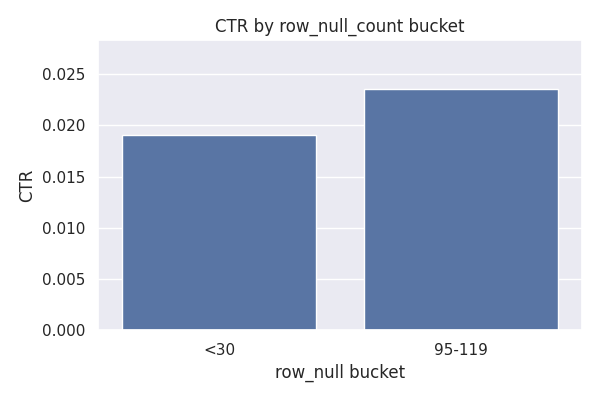

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df_cli = null_bucket_cli.to_pandas()
sns.set_theme()
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_df_cli, x='null_bucket', y='ctr', color='C0')
plt.title('CTR by row_null_count bucket')
plt.xlabel('row_null bucket')
plt.ylabel('CTR')
plt.ylim(0.0, plot_df_cli['ctr'].max() * 1.2)
plt.tight_layout()
plt.show()


## TODO
- 플래그 도입 전/후 LightGBM 비교
- row_nulls ≥ 95 행 별도 모델링 여부 결정
- 제출 파이프라인 영향 평가 (run_id 공유)
